In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

titanic_data=pd.read_csv('train.csv')
titanic_data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [7]:
print('# of passengers travelling in titanic:'+str(len(titanic_data)))

# of passengers travelling in titanic:891


## Analyzing Data

In [8]:
# for counting the passengers who survived or not

<AxesSubplot:xlabel='Survived', ylabel='count'>

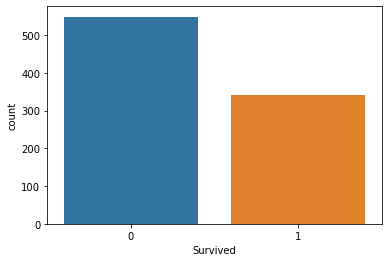

In [17]:
sns.countplot(x='Survived', data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

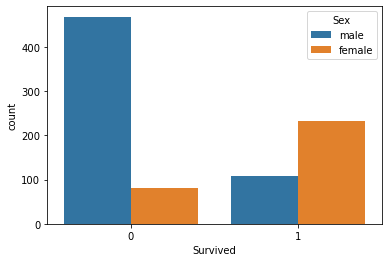

In [19]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

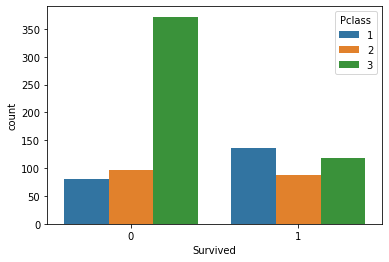

In [20]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

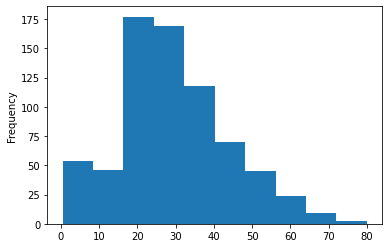

In [21]:
titanic_data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

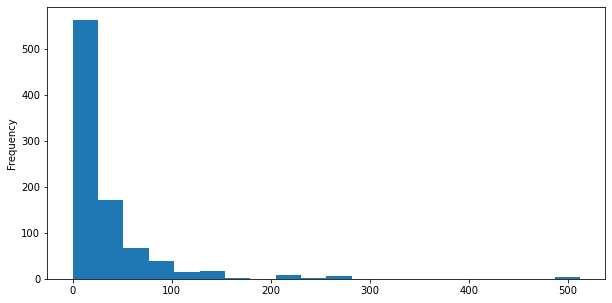

In [24]:
titanic_data['Fare'].plot.hist(bins=20, figsize=(10,5))

## Data Wranggling / Cleaning

In [28]:
titanic_data.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

<AxesSubplot:>

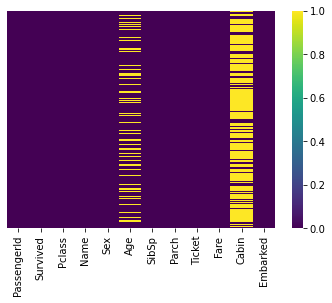

In [38]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap='viridis')
# valuues in yellow are null

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

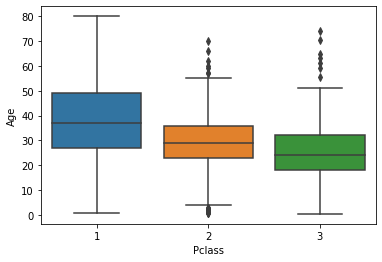

In [39]:
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

In [43]:
titanic_data.drop('Cabin',axis=1, inplace=True) 

In [48]:
titanic_data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [45]:
titanic_data.dropna(inplace=True)  #dropping all rows will null values 

<AxesSubplot:>

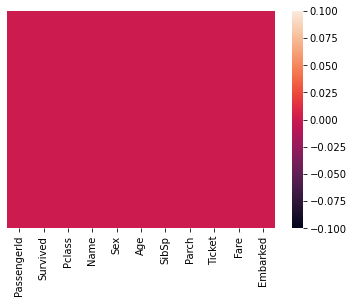

In [50]:
sns.heatmap(titanic_data.isnull(), yticklabels=False)

In [52]:
titanic_data.isnull().sum()   # our dataset is clean as it not havinf any null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [53]:
titanic_data.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S

In [54]:
# since our data is having a lot of strings we have to convert them in categorical variables in order to implement logistic regression

In [60]:
sex=pd.get_dummies(titanic_data['Sex'], drop_first=True)

In [61]:
embark=pd.get_dummies(titanic_data['Embarked'], drop_first=True)

In [59]:
pcl=pd.get_dummies(titanic_data['Pclass'], drop_first=True)

In [62]:
titanic_data=pd.concat([titanic_data,sex,pcl,embark], axis=1)

In [63]:
titanic_data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  2  3  Q  S  
0      0         A/5 21171   7.2500        S     1  0  1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  0  1  
3      0            113803  53.1000        S     0  0  0  0  1  
4      0            373450   8.0500        S     1  0  1  0  1

In [70]:
titanic_data.drop(['Sex','Ticket','PassengerId','Pclass','Name','Embarked'],axis=1, inplace=True)

In [71]:
titanic_data.head()

Survived   Age  SibSp  Parch     Fare  male  2  3  Q  S
0         0  22.0      1      0   7.2500     1  0  1  0  1
1         1  38.0      1      0  71.2833     0  0  0  0  0
2         1  26.0      0      0   7.9250     0  0  1  0  1
3         1  35.0      1      0  53.1000     0  0  0  0  1
4         0  35.0      0      0   8.0500     1  0  1  0  1

## Training and Testing your data

In [83]:
x=titanic_data.drop(['Survived'], axis=1)
y=titanic_data['Survived']

In [75]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.24.2-cp38-cp38-win_amd64.whl (6.9 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)


In [78]:
from sklearn.model_selection import cross_validate

In [ ]:
# Cross validatio is a technique in which we train our mdoel using the subset of the dataset and
# then evaluate using the complementary subset of the dataset.
#It is statistical method to estimate performance(or accuracy) of the machine learning model.
# It is used to protect against overfitting in a perdictive model, particularly in case where the amount of data is limited.

In [80]:
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=1)

In [86]:
from sklearn.linear_model import LogisticRegression

In [91]:
logmodel=LogisticRegression(max_iter=10000)

In [92]:
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [93]:
predictions = logmodel.predict(x_test)

In [94]:
from sklearn.metrics import classification_report

In [95]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [98]:
confusion_matrix(y_test, predictions)
#it is matrix-->
#            predictive NO    predictive YES
# Actual NO    102               24
# Actual YES   25                63

array([[102,  24],
       [ 25,  63]], dtype=int64)

In [99]:
accuracy_score(y_test, predictions)

0.7710280373831776